## Skill-Assessment Exercise 10.9

#### PROBLEM

Using the open-loop frequency response for the system in Figure 10.10, where

$$
G(s) = \frac{100}{s(s+5)}
$$

estimate the percent overshoot, settling time, and peak time for the closed-loop step response.

#### ANSWER

Example 10.11 from the book is followed here.

To find overshoot, the damping ratio $\zeta$ is needed (Eq 4.38).

To find $T_{s}$ and $T_{p}$, Equations 10.55 and 10.56 can be used. For these, the damping ratio $\zeta$ and $\omega_{BW}$ are needed.

$\omega_{BW}$ can be determined using the open-loop magnitude and phase Bode plots.

$\zeta$ can be determined by computing the phase margin from these Bode plots.

Since these Bode plots are needed, they've been generated below.

The book uses its own phase margin vs damping ratio plot, but our own has been generated below to give more precise values.

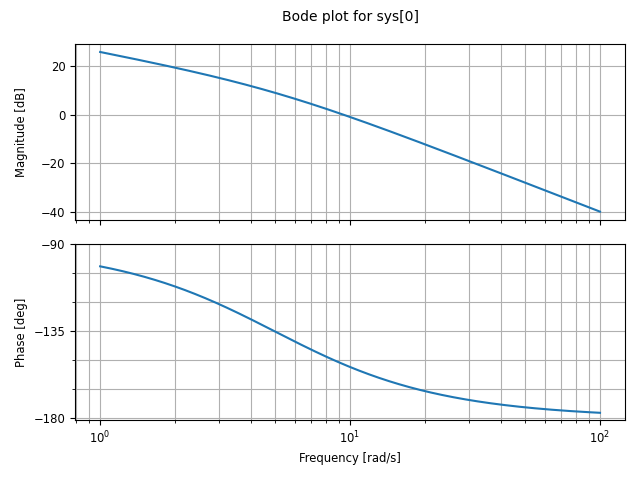

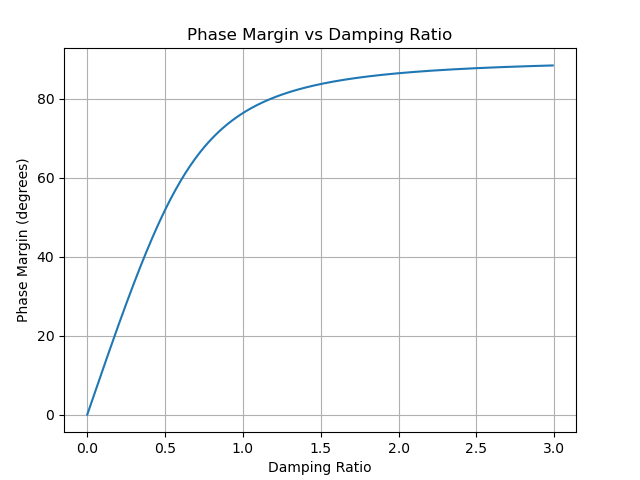

In [1]:
#  Import libraries
import numpy as np
import matplotlib.pyplot as plt
import control as ct
# Make plots interactable
%matplotlib ipympl

# Generate Bode plots
numg = [100]
deng = np.poly([0,-5])
G = ct.tf(numg, deng)
fig = plt.figure(1)
ct.bode(G, dB=True)

# Clean up workspace
del numg, deng, G, fig

# Since it's difficult to precisely determine damping ratio using Fig 10.48 in the book,
# the phase margin vs damping ratio plot is recreated here. Since the plot is interactable,
# the plot can be zoomed in with as much precision as needed to view phase and damping ratio values.
# Hovering over the plot also reports the exact value your cursor is over, giving more precision.

# Compute phase margin values
zeta = np.arange(0, 3.0, 0.01)
phase_margin_num = 2*zeta
phase_margin_den = np.sqrt(-2*zeta**2+np.sqrt(1+4*zeta**4))
phase_margin = np.arctan2(phase_margin_num, phase_margin_den) # Eq 10.73
phase_margin = (180/np.pi)*phase_margin             # Convert phase margin to degrees

# Plot phase margin vs damping ratio
fig = plt.figure(2)                                 # Create figure 2
ax = fig.add_axes([0.1,0.1,0.8,0.8])                # Create axis object
ax.plot(zeta, phase_margin)                         # Plot damp rat vs phase margin
ax.set_xlabel('Damping Ratio')
ax.set_ylabel('Phase Margin (degrees)')
ax.set_title('Phase Margin vs Damping Ratio')
ax.grid(True)

# Clean up workspace
del zeta, phase_margin, phase_margin_den, phase_margin_num, fig, ax


$$
%OS = e^{}
$$

OS (overshoot) will first be found, so the damping ratio $\zeta$ needs to be computed.

However, to compute $\zeta$, the phase margin needs to be computed.

Using the open-loop Bode plots, find the phase value when the magnitude is 0dB. The Bode plot shows that the magnitude is 0dB at $\approx$ 9.4 rad/s and that the phase at this frequency is $\approx$ -151 deg. The phase margin is then -151-(-180) = 29 deg.

Using the phase margin vs damping ratio chart above, the chart shows at phase margin = 29 deg, the damping ratio $\zeta$ = 0.26. Plug $\zeta$ into the OS equation.

$$
OS = 100\cdot e^{-\zeta \pi / \sqrt{1-\zeta^{2}}}
= 100\cdot e^{-0.26\pi / \sqrt{1-0.26^{2}}} = 42.9 \approx 43
$$

Next, $T_{s}$ and $T_{p}$ will be found. Since $\zeta$ is now known, only $\omega_{BW}$ needs to be determined.

Using the open-loop Bode plots, find a frequency where the magnitude is between -6 and -7.5 dB. When found, verify that the phase is between -135 and -225 deg. I selected $\omega = 14 rad/s$; thus, this is our $\omega_{BW}$.

With $\zeta$ and $\omega_{BW}$ found, $T_{s}$ and $T_{p}$ can be computed.

Plug $\zeta$ and $\omega_{BW}$ into Eq 10.55 and solve for $T_{s}$. For ease of solving, swap $\omega_{BW}$ and $T_{s}$.

$$
T_{s} = \frac{4}{\omega_{BW}\zeta}\sqrt{1-2\zeta^{2}+\sqrt{4\zeta^{4}-4\zeta^{2}+2}}
$$
$$
      = \frac{4}{14\cdot 0.26}\sqrt{1-2\cdot 0.26^{2}+\sqrt{4\cdot 0.26^{4}-4\cdot 0.26^{2}+2}}
$$
$$
    T_{s}  = 1.62 s
$$

Similarly, use Eq 10.56 to solve for $T_{p}$.

$$
T_{p} = \frac{\pi}{\omega_{BW}\sqrt{1-\zeta^{2}}}\sqrt{1-2\zeta^{2}+\sqrt{4\zeta^{4}-4\zeta^{2}+2}}
$$
$$
      = \frac{\pi}{14\sqrt{1-0.26^{2}}}\sqrt{1-2\cdot 0.26^{2}+\sqrt{4\cdot 0.26^{4}-4\cdot 0.26^{2}+2}}
$$
$$
T_{p} = 0.34 s
$$